In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("insurance(in).csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.describe(exclude="number")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [12]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [13]:
df['charges'].value_counts()

,count
charges,
1639.56310,2
2221.56445,1
19798.05455,1
13063.88300,1
13555.00490,1
...,...
1149.39590,1
37079.37200,1
4738.26820,1


In [14]:
df.duplicated(keep="first").sum()

np.int64(1)

In [15]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(1337, 7)

In [18]:
smoker_df = df.groupby('smoker')['charges'].mean().reset_index()
smoker_df

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


In [19]:
gender_df = df.groupby('sex')['charges'].mean().reset_index()
gender_df

,sex,charges
0,female,12569.578844
1,male,13974.998864


In [20]:
region_df = df.groupby('region')['charges'].mean().reset_index()
region_df

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


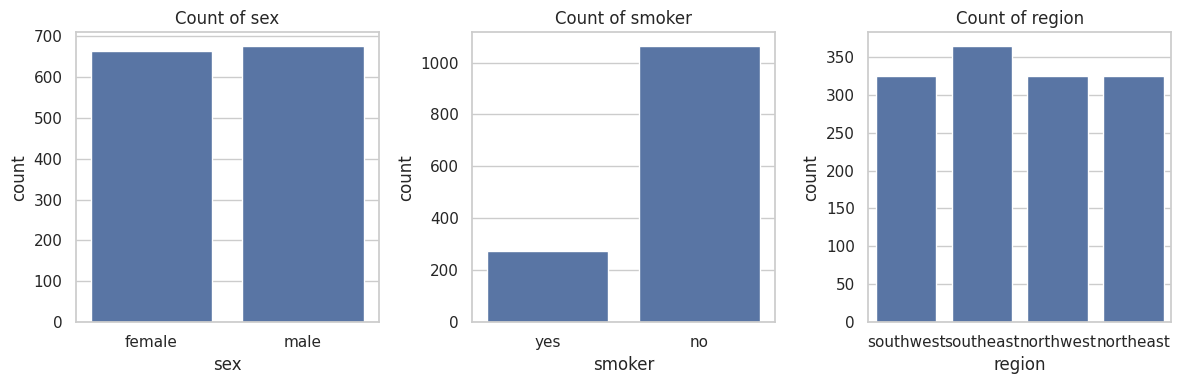

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))
cat_cols = ['sex', 'smoker', 'region']

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

In [22]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


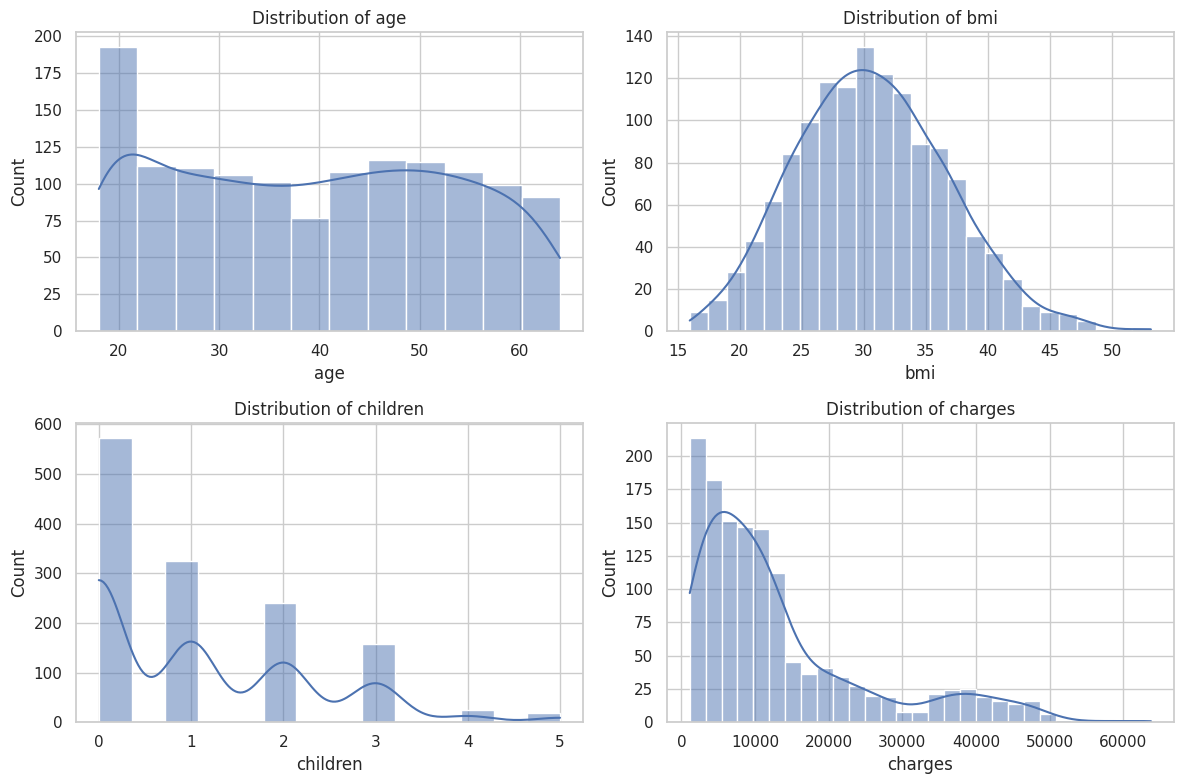

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
numeric_cols = ['age', 'bmi', 'children', 'charges']

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()


In [25]:
df = pd.get_dummies(df, columns=['region'], dtype=int)

In [26]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


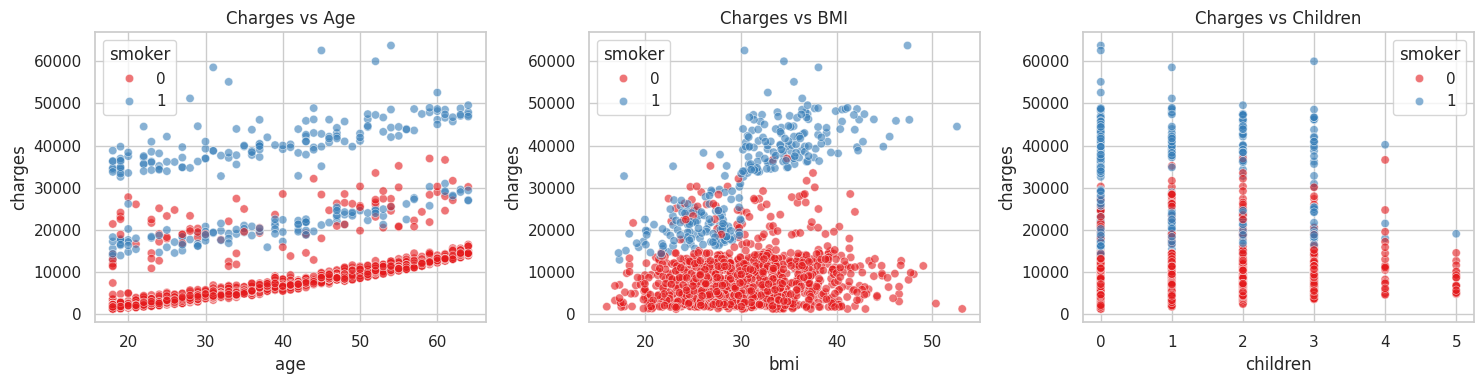

In [27]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette='Set1', alpha=0.6)
plt.title('Charges vs Age')

plt.subplot(1, 3, 2)
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette='Set1', alpha=0.6)
plt.title('Charges vs BMI')

plt.subplot(1, 3, 3)
sns.scatterplot(x='children', y='charges', data=df, hue='smoker', palette='Set1', alpha=0.6)
plt.title('Charges vs Children')

plt.tight_layout()
plt.show()


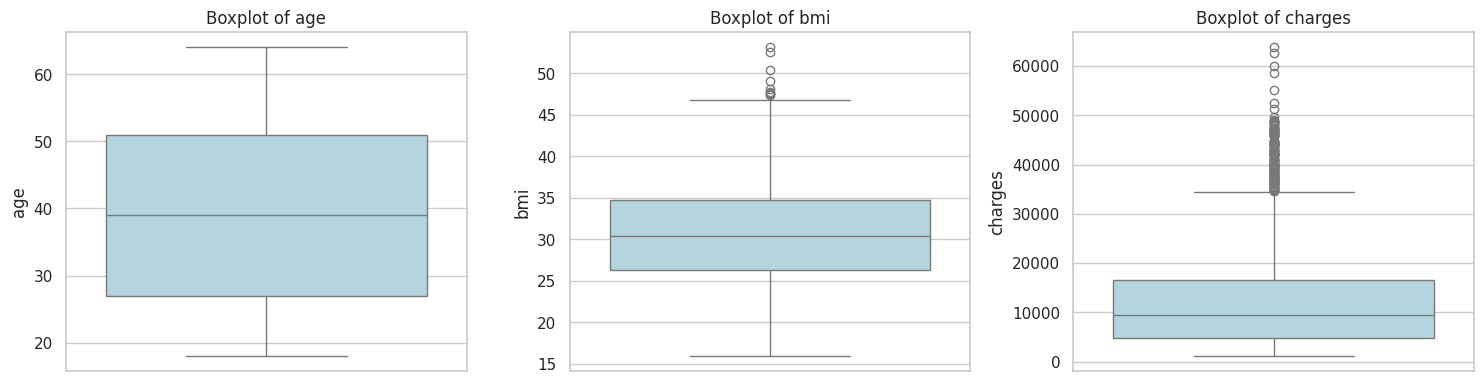

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))

for i, col in enumerate(['age', 'bmi', 'charges'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [29]:
df['children'].value_counts().sort_index()


,count
children,
0,573
1,324
2,240
3,157
4,25
5,18


In [30]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]

    print(f"{column} → {len(outliers)} outliers detected")
    return outliers, lower, upper


In [31]:
bmi_outliers, bmi_lower, bmi_upper = detect_outliers_iqr(df, 'bmi')
charges_outliers, charges_lower, charges_upper = detect_outliers_iqr(df, 'charges')

bmi → 9 outliers detected
charges → 139 outliers detected


In [32]:
# Replace bmi values above upper bound with the cap value
df['bmi'] = df['bmi'].apply(lambda x: bmi_upper if x > bmi_upper else x)

In [33]:
bmi_outliers, bmi_lower, bmi_upper = detect_outliers_iqr(df, 'bmi')


bmi → 0 outliers detected


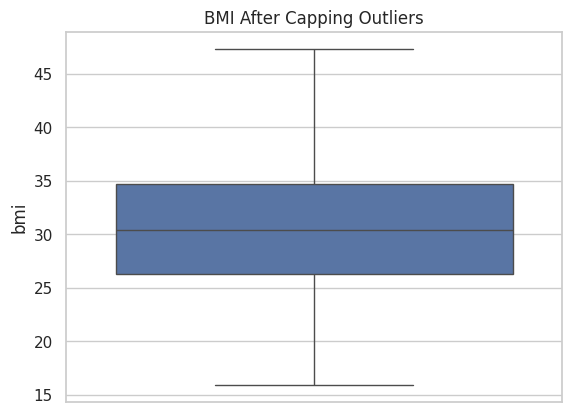

In [34]:
sns.boxplot(y=df['bmi'])
plt.title("BMI After Capping Outliers")
plt.show()


In [35]:
df['log_charges'] = np.log(df['charges'])

In [36]:
X = df.drop(columns=['charges', 'log_charges'])
y = df['log_charges']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
cols_to_scale = ['age', 'bmi', 'children']

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])